In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates

In [90]:
_data = pd.read_csv('./data/my_table_1018.csv')

In [91]:
_data.head(10)

,REG_SEQ,GATEWAY_ID,REPEATER_ID,DEVICE_ID,TYPE,TEMP,HUMIDITY,SMOKE_DEN,MIT,DEN,SMELL_DEN,BATT_CAP,STATUS,REG_DTIME,SN,BUTANE,CURRENT,FLAME,DEVICE_TYPE
0,7343,1,3,4,0.0,23.0,15.0,2256.0,0.0,NaN,NaN,3.59,0.0,2020-12-04 15:32:46,NaN,NaN,NaN,NaN,NaN
1,7344,1,3,4,0.0,28.0,16.0,2036.0,0.0,NaN,NaN,3.48,0.0,2020-12-04 15:33:39,NaN,NaN,NaN,NaN,NaN
2,7345,1,3,5,4.0,33.0,11.0,NaN,NaN,165.0,223.0,3.66,4.0,2020-12-04 16:05:56,NaN,NaN,NaN,NaN,NaN
3,7346,1,3,4,0.0,26.0,17.0,2036.0,0.0,NaN,NaN,3.49,0.0,2020-12-04 16:06:05,NaN,NaN,NaN,NaN,NaN
4,7347,1,3,4,0.0,26.0,17.0,2035.0,0.0,NaN,NaN,3.49,0.0,2020-12-04 16:06:40,NaN,NaN,NaN,NaN,NaN
5,7348,1,3,5,4.0,32.0,11.0,NaN,NaN,166.0,217.0,3.56,4.0,2020-12-04 16:06:59,NaN,NaN,NaN,NaN,NaN
6,7349,1,3,5,4.0,33.0,11.0,NaN,NaN,166.0,223.0,3.66,4.0,2020-12-04 16:07:23,NaN,NaN,NaN,NaN,NaN
7,7350,1,3,5,4.0,33.0,11.0,NaN,NaN,166.0,220.0,3.61,4.0,2020-12-04 16:07:30,NaN,NaN,NaN,NaN,NaN
8,7351,1,3,5,4.0,33.0,11.0,NaN,NaN,166.0,223.0,3.66,4.0,2020-12-04 16:07:44,NaN,NaN,NaN,NaN,NaN
9,7352,1,3,5,4.0,33.0,12.0,NaN,NaN,167.0,226.0,3.71,4.0,2020-12-04 16:08:51,NaN,NaN,NaN,NaN,NaN


In [92]:
_data.dtypes

REG_SEQ          int64
GATEWAY_ID       int64
REPEATER_ID      int64
DEVICE_ID        int64
TYPE           float64
TEMP           float64
HUMIDITY       float64
SMOKE_DEN      float64
MIT            float64
DEN            float64
SMELL_DEN      float64
BATT_CAP       float64
STATUS         float64
REG_DTIME       object
SN             float64
BUTANE         float64
CURRENT        float64
FLAME          float64
DEVICE_TYPE    float64
dtype: object

### datetime으로 인덱스 지정

In [93]:
#datetime으로 type 변경
_data.index = pd.to_datetime(_data['REG_DTIME'])

In [94]:
_data.index.max()

Timestamp('2021-10-18 22:16:05')

In [95]:
data_all = _data.truncate(before='2021-04-01 00:00:00')

In [96]:
device_4_all = data_all['DEVICE_ID'] == 4
device_5_all = data_all['DEVICE_ID'] == 5
data4_all = data_all[device_4_all]
data5_all = data_all[device_5_all]

In [99]:
np.unique(data4_all['GATEWAY_ID'].values)

array([1, 2, 4])

### TEMP,HUMIDITY,SMOKE_DEN ,SMELL_DEN,REG_DTIME 추출

In [9]:
data4_all = data4_all[['TEMP','HUMIDITY','SMOKE_DEN','REG_DTIME']]
data5_all = data5_all[['TEMP','HUMIDITY','SMELL_DEN','DEN','REG_DTIME']]

In [10]:
data4_all = data4_all.fillna(0)
data5_all = data5_all.fillna(0)

### scaling

In [11]:
def minmax_scaling(df):
    col = df.columns
    for i in range(len(col)):
        min_value = min(df[col[i]])
        max_value = max(df[col[i]])
        df.iloc[:,i] = (df.iloc[:,i] - min_value)/(max_value - min_value)
    return df

In [12]:
scaled_data4_all = data4_all.copy()
scaled_data5_all = data5_all.copy()
scaled_data4_all.iloc[:,:3] = minmax_scaling(scaled_data4_all.iloc[:,:3])
scaled_data5_all.iloc[:,:4] = minmax_scaling(scaled_data5_all.iloc[:,:4])

### device 4 전체 데이터 시각화 (3월부토끝까지) - scaling 전

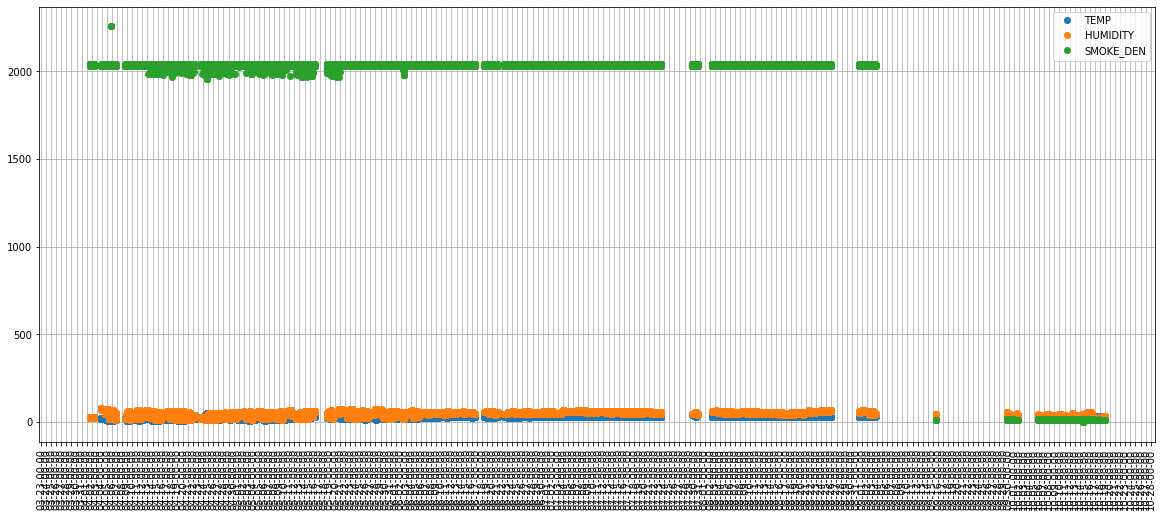

In [14]:
plt.figure(figsize = (20,8))
plt.plot_date(data4_all.index.values, data4_all[['TEMP','HUMIDITY','SMOKE_DEN']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.grid()
plt.legend(['TEMP','HUMIDITY','SMOKE_DEN'])
plt.show()

In [ ]:
plt.figure(figsize = (20,8))
plt.plot_date(data4_all.index.values, data4_all[['TEMP','HUMIDITY','SMOKE_DEN']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.grid()
plt.legend(['TEMP','HUMIDITY','SMOKE_DEN'])
plt.show()

### device 4 전체 데이터 시각화 (3월부토끝까지) - scaling 후

In [ ]:
plt.figure(figsize = (20,8))
plt.plot_date(scaled_data4_all.index.values, scaled_data4_all[['TEMP','HUMIDITY','SMOKE_DEN']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.axvline(pd.Timestamp('2021-04-12 15:00:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-12 15:30:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-17 17:50:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-17 21:00:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 15:00:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 17:00:00'),color='black')
plt.grid()
plt.legend(['TEMP','HUMIDITY','SMOKE_DEN'])
plt.title('== Device 4 ==')
plt.show()

### device 5 전체 데이터 시각화 (4월~) - scaling 전

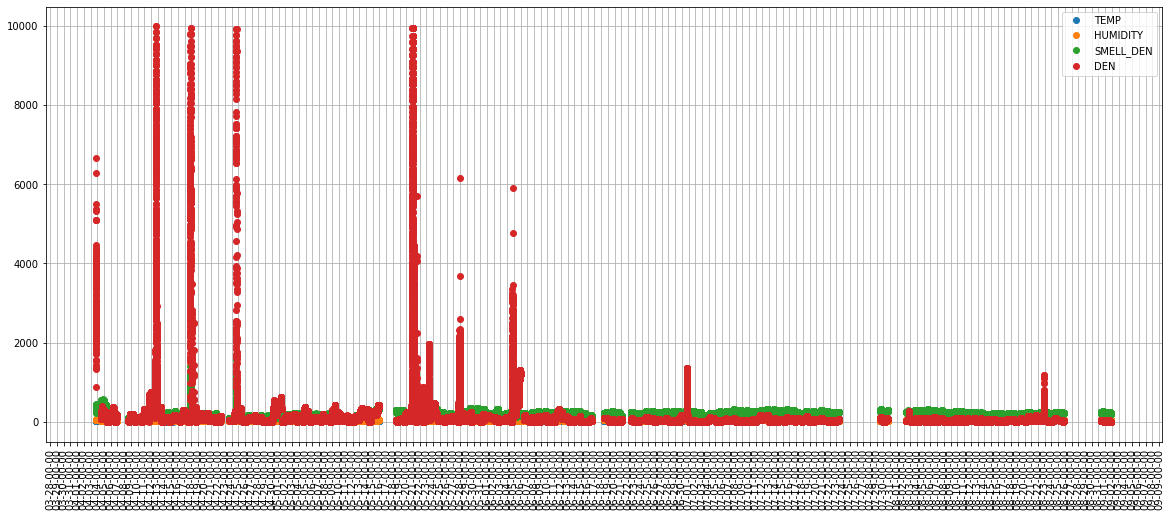

In [16]:
plt.figure(figsize = (20,8))
plt.plot_date(data5_all.index.values, data5_all[['TEMP','HUMIDITY','DEN','SMELL_DEN']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.grid()
plt.legend(['TEMP','HUMIDITY','SMELL_DEN','DEN'])
plt.show()

### device 5 전체 데이터 시각화 (3월부토끝까지) - scaling 후

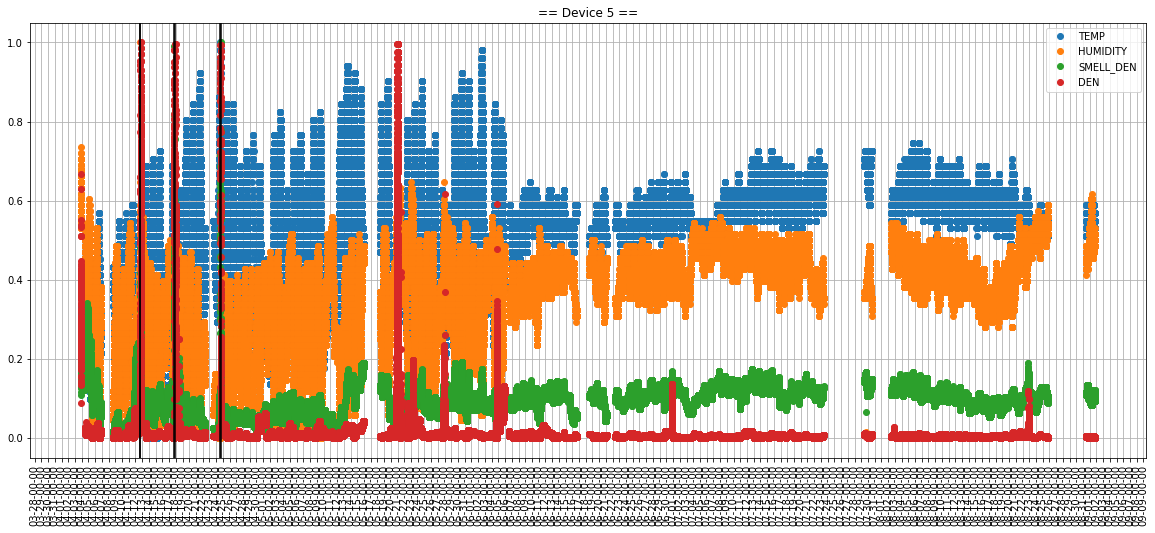

In [17]:
plt.figure(figsize = (20,8))
plt.plot_date(scaled_data5_all.index.values, scaled_data5_all[['TEMP','HUMIDITY','DEN','SMELL_DEN']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.axvline(pd.Timestamp('2021-04-12 15:00:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-12 15:30:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-17 17:50:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-17 21:00:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 15:00:00'),color='black')
plt.axvline(pd.Timestamp('2021-04-24 17:00:00'),color='black')
plt.grid()
plt.legend(['TEMP','HUMIDITY','SMELL_DEN','DEN'])
plt.title('== Device 5 ==')
plt.show()

#### 화재 시뮬레이션

### 2021년 6월 8일부터 8월 25일까지의 데이터만 사용

In [57]:
_data_raw = _data.truncate(before='2021-06-08 00:00:00')
# data_raw = _data_raw.truncate(after='2021-10-08 0:00:00')
data_raw = _data_raw

### device4와 device5 데이터 추출

In [58]:
is_device_4 = data_raw['DEVICE_ID'] == 4
is_device_5 = data_raw['DEVICE_ID'] == 5
data4 = data_raw[is_device_4]
data5 = data_raw[is_device_5]

In [59]:
data4.tail()


,REG_SEQ,GATEWAY_ID,REPEATER_ID,DEVICE_ID,TYPE,TEMP,HUMIDITY,SMOKE_DEN,MIT,DEN,SMELL_DEN,BATT_CAP,STATUS,REG_DTIME,SN,BUTANE,CURRENT,FLAME,DEVICE_TYPE
REG_DTIME,,,,,,,,,,,,,,,,,,,
2021-10-18 22:11:46,2457465,4,1,4,0.0,21.3,32.2,12.0,0.0,NaN,NaN,100.0,NaN,2021-10-18 22:11:46,128.0,NaN,NaN,NaN,NaN
2021-10-18 22:12:45,2457471,4,1,4,0.0,21.3,32.2,12.0,0.0,NaN,NaN,100.0,NaN,2021-10-18 22:12:45,129.0,NaN,NaN,NaN,NaN
2021-10-18 22:13:46,2457479,4,1,4,0.0,21.3,32.2,13.0,0.0,NaN,NaN,100.0,NaN,2021-10-18 22:13:46,130.0,NaN,NaN,NaN,NaN
2021-10-18 22:14:46,2457486,4,1,4,0.0,21.3,32.2,13.0,0.0,NaN,NaN,100.0,NaN,2021-10-18 22:14:46,131.0,NaN,NaN,NaN,NaN
2021-10-18 22:15:47,2457493,4,1,4,0.0,21.3,32.2,13.0,0.0,NaN,NaN,100.0,NaN,2021-10-18 22:15:47,132.0,NaN,NaN,NaN,NaN


In [60]:
data5.isnull().sum()

REG_SEQ             0
GATEWAY_ID          0
REPEATER_ID         0
DEVICE_ID           0
TYPE                0
TEMP                0
HUMIDITY            0
SMOKE_DEN      693651
MIT            693651
DEN              5319
SMELL_DEN        5319
BATT_CAP            0
STATUS          70744
REG_DTIME           0
SN             678552
BUTANE         698970
CURRENT        749296
FLAME          698970
DEVICE_TYPE    749296
dtype: int64

### device4와 device5에서 일별로 수집된 데이터 수

In [61]:
data4['count'] = 1
data5['count'] = 1

<ipython-input-61-25aeab6809d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['count'] = 1
<ipython-input-61-25aeab6809d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['count'] = 1


In [62]:
data4['count'].resample('D').sum()

REG_DTIME
2021-06-08     8069
2021-06-09     7989
2021-06-10     7886
2021-06-11     7934
2021-06-12     7978
              ...  
2021-10-14     1261
2021-10-15     1967
2021-10-16     6428
2021-10-17    26104
2021-10-18     1913
Freq: D, Name: count, Length: 133, dtype: int64

In [63]:
data5['count'].resample('D').sum()

REG_DTIME
2021-06-08     7795
2021-06-09     7976
2021-06-10     7934
2021-06-11     7937
2021-06-12     8036
              ...  
2021-10-14     5380
2021-10-15     6489
2021-10-16    14850
2021-10-17    18190
2021-10-18      659
Freq: D, Name: count, Length: 133, dtype: int64

### 중복값 확인

In [41]:
# device 4
dup_idx_4 = np.ravel(np.where(data4.duplicated(['REG_DTIME']) == True))
# device 5
dup_idx_5 = np.ravel(np.where(data5.duplicated(['REG_DTIME']) == True))

In [42]:
print(dup_idx_4, dup_idx_5)

[ 16584  16593  17589 ... 258303 258304 258305] [ 17775  17780  18881 ... 289807 289808 289809]


In [24]:
data4.iloc[9173][:4]

REG_SEQ        649112
GATEWAY_ID          1
REPEATER_ID         3
DEVICE_ID           4
Name: 2021-06-09 03:17:15, dtype: object

### 중복은 평균값으로 대체

In [ ]:
after_data4 = data4.copy()
for i in dup_idx_4:
    dup_date = data4['REG_DTIME'].iloc[i]
    dup_array = np.ravel(np.where(data4['REG_DTIME'] == dup_date))
    for n,j in enumerate(dup_array):
        if n== 0:
            init_idx = j
            left = data4.iloc[j][:3].copy()
        else : 
            left += data4.iloc[j][:3].copy()
    after_data4.iloc[init_idx,:3] = left/len(dup_array)


In [ ]:
after_data5 = data5.copy()
for i in dup_idx_5:
    dup_date = data5['REG_DTIME'].iloc[i]
    dup_array = np.ravel(np.where(data5['REG_DTIME'] == dup_date))
    for n,j in enumerate(dup_array):
        if n== 0:
            init_idx = j
            left = data5.iloc[j][:4].copy()
        else : 
            left += data5.iloc[j][:4].copy()
    after_data5.iloc[init_idx,:4] = left/len(dup_array)

In [ ]:
after_data4.drop_duplicates(['REG_DTIME'], keep='first',inplace = True)
after_data5.drop_duplicates(['REG_DTIME'], keep='first',inplace = True)

In [ ]:
print(np.ravel(np.where(after_data4.duplicated(['REG_DTIME']) == True)))
print(np.ravel(np.where(after_data5.duplicated(['REG_DTIME']) == True)))

### device4 통계량

In [ ]:
after_data4.describe()

### device 5 통계량

In [ ]:
after_data5.describe()

### minmax scaling

In [64]:
def minmax_scaling(df):
    col = df.columns
    for i in range(len(col)):
        min_value = min(df[col[i]])
        max_value = max(df[col[i]])
        df.iloc[:,i] = (df.iloc[:,i] - min_value)/(max_value - min_value)
    return df

In [65]:
# after_data4 = after_data4.fillna(0) #중복제거한 데이터용
# after_data5 = after_data5.fillna(0) #
after_data4 = data4.fillna(0)
after_data5 = data5.fillna(0)

In [66]:
scaled_data4 = after_data4.copy()
scaled_data5 = after_data5.copy()
scaled_data4.iloc[:,:3] = minmax_scaling(scaled_data4.iloc[:,:3])
scaled_data5.iloc[:,:4] = minmax_scaling(scaled_data5.iloc[:,:4])

### scaling 전 device 4 각 변수들


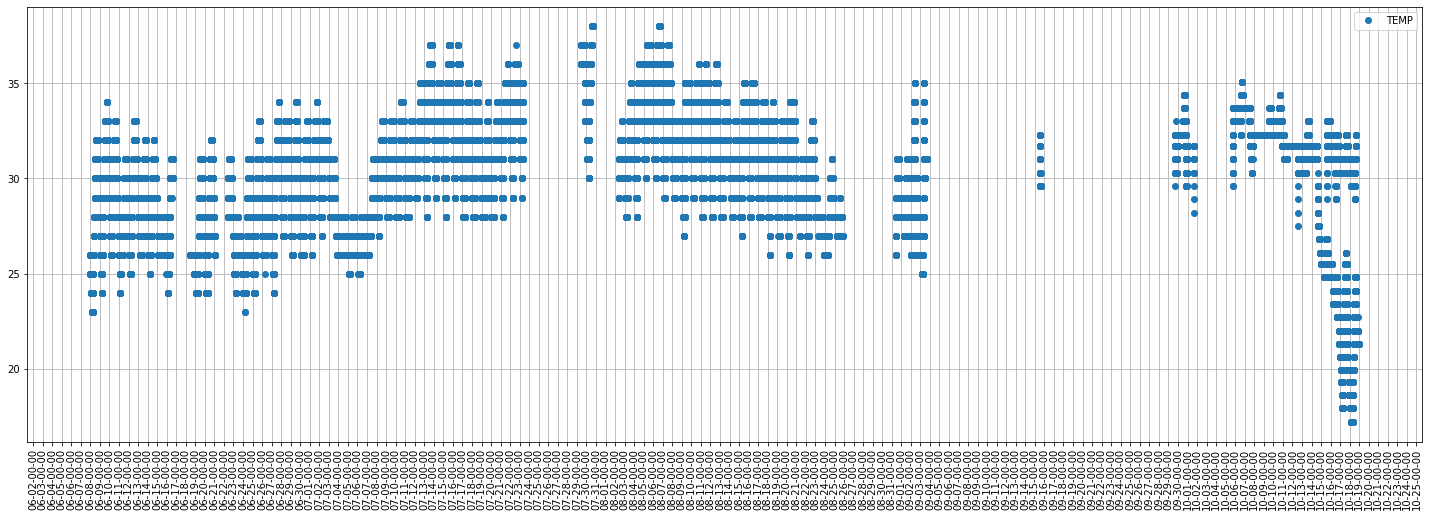

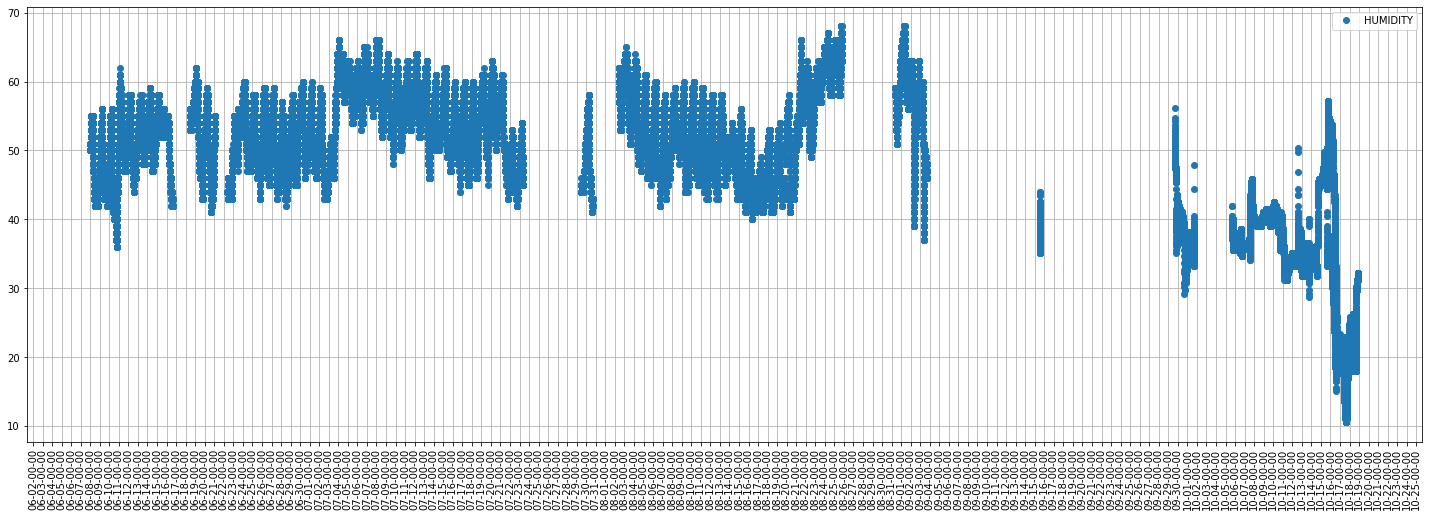

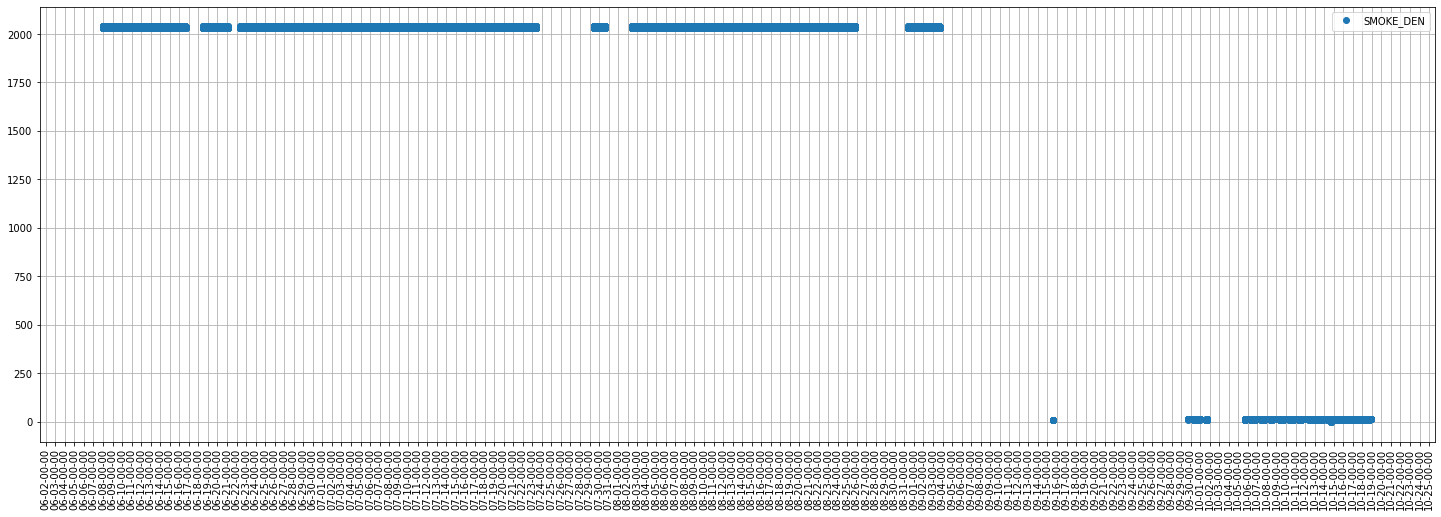

In [76]:
from matplotlib import dates
for var in ['TEMP','HUMIDITY','SMOKE_DEN']:
    plt.figure(figsize = (25,8))
    plt.plot_date(after_data4.index.values, after_data4[[var]],label = var)
    plt.gca().xaxis.set_major_locator(dates.DayLocator())
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
    plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
    plt.grid()
    plt.legend()
    plt.show()

### scaling 전 device 5 각 변수들



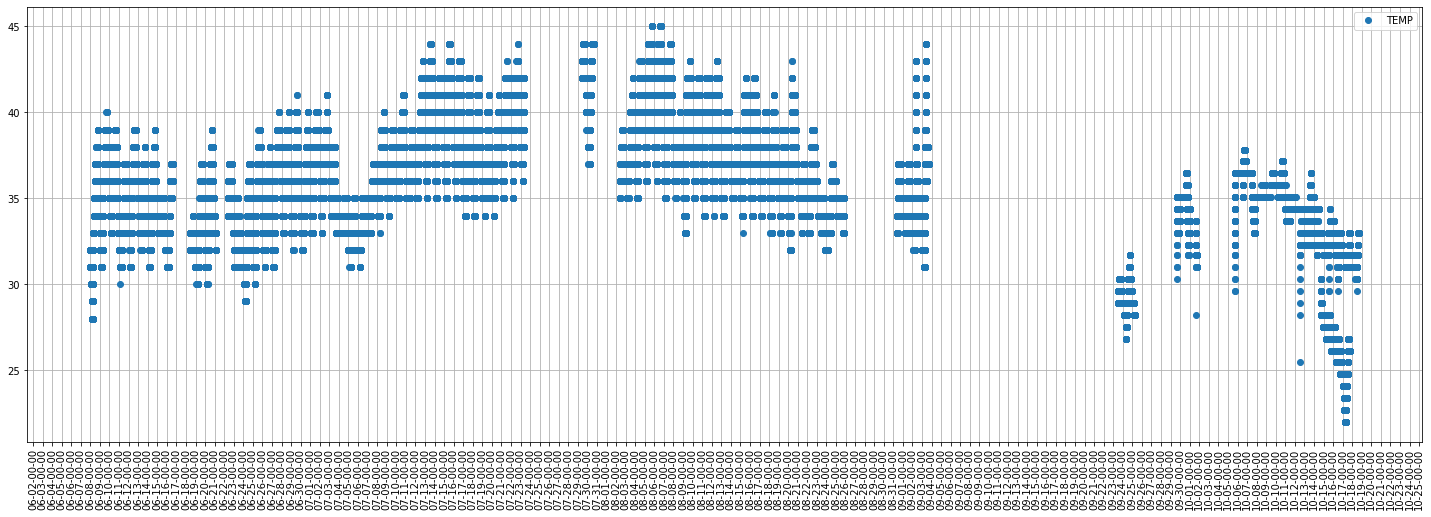

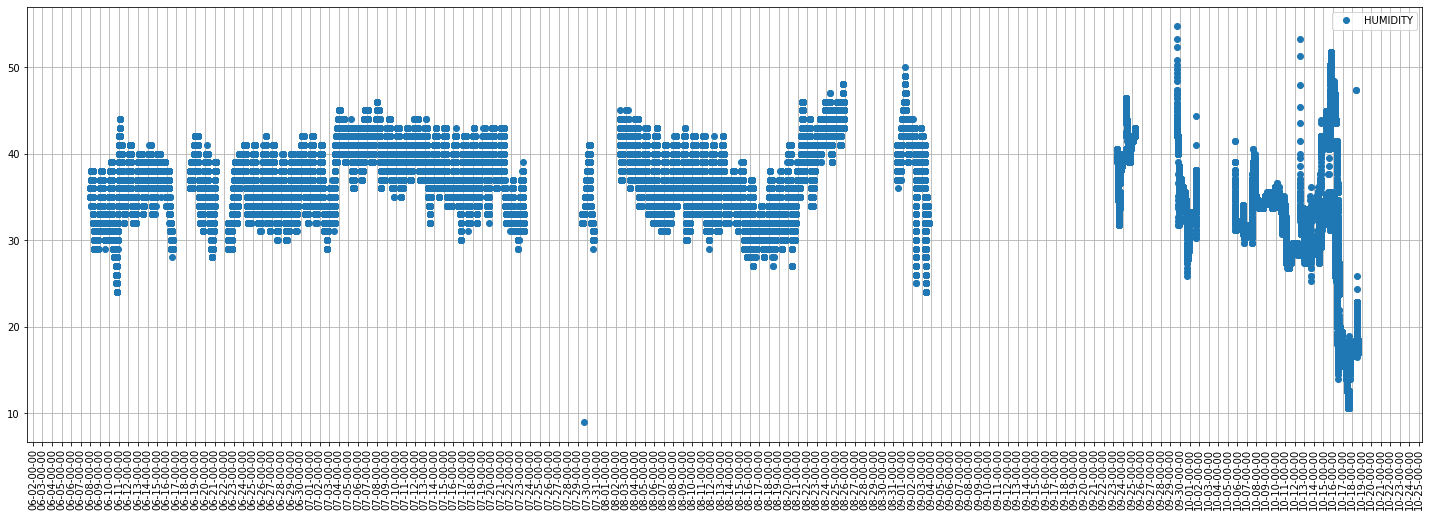

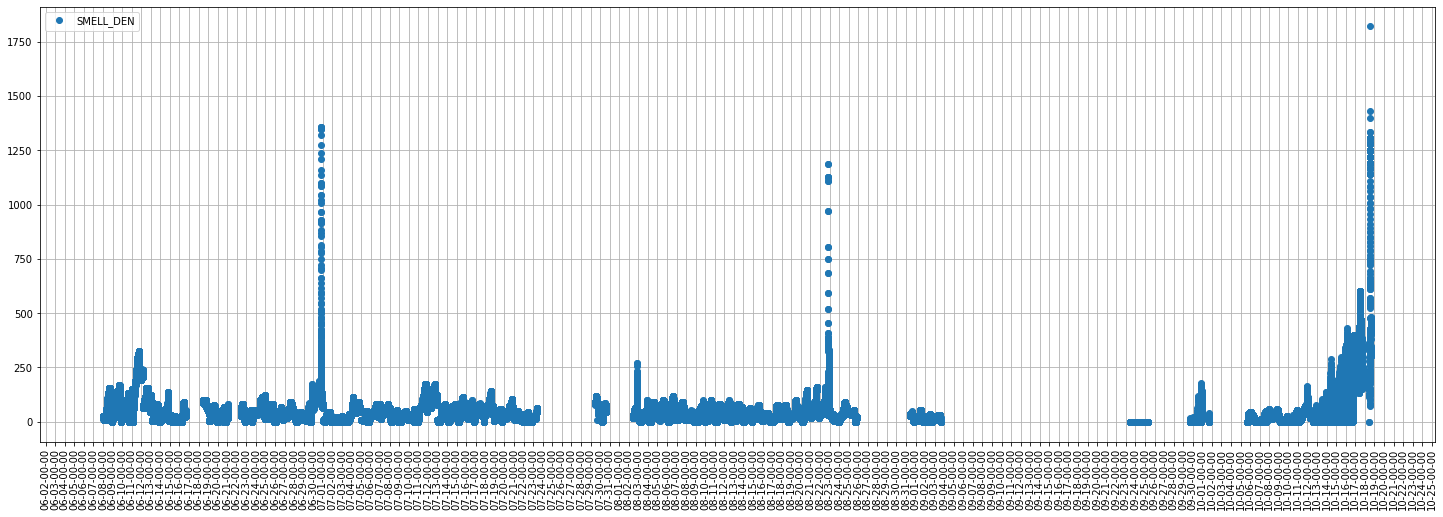

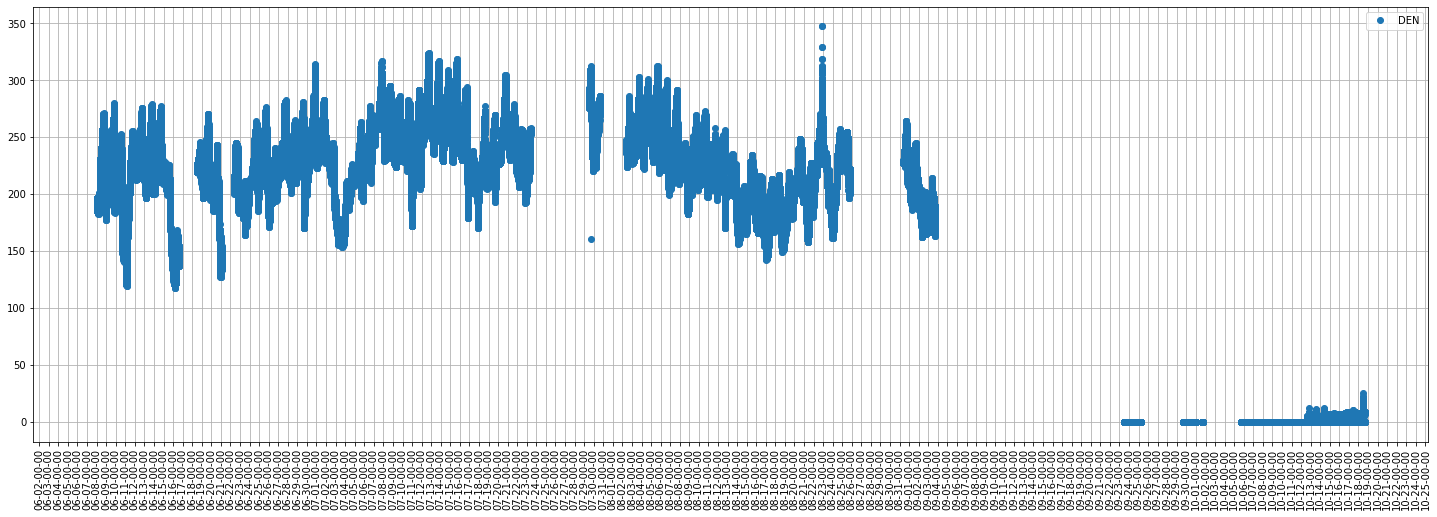

In [72]:
for var in ['TEMP','HUMIDITY','SMELL_DEN','DEN']:
    plt.figure(figsize = (25,8))
    plt.plot_date(after_data5.index.values, after_data5[[var]],label = var)
    plt.gca().xaxis.set_major_locator(dates.DayLocator())
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
    plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
    plt.grid()
    plt.legend()
    plt.show()

### scaling 후 device 4

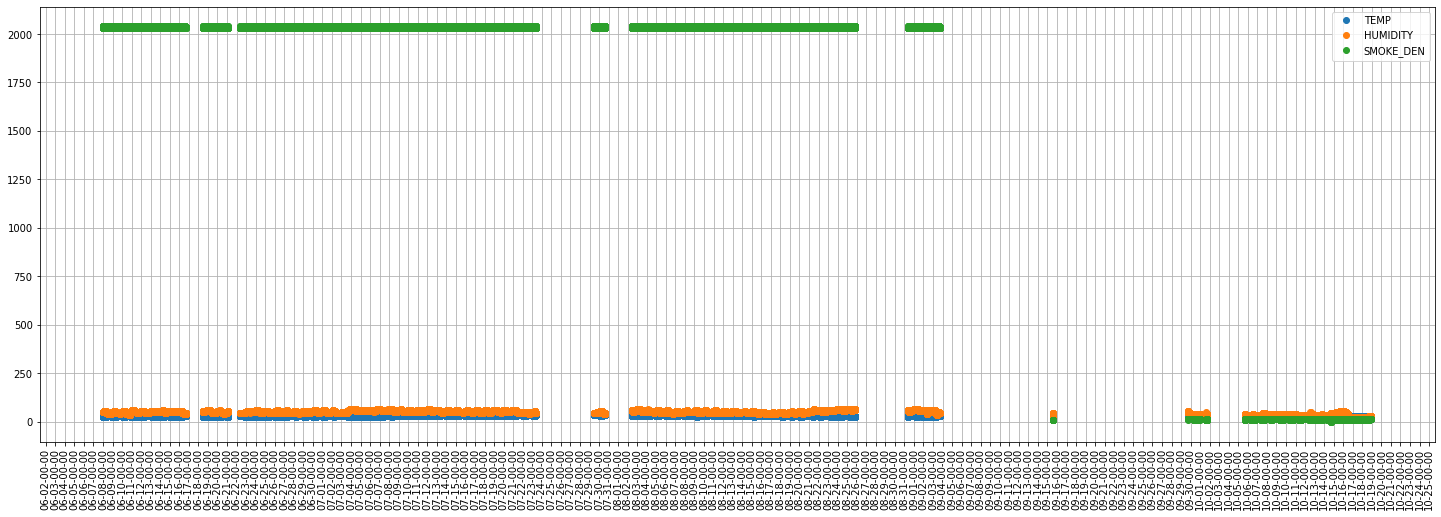

In [73]:
plt.figure(figsize = (25,8))
plt.plot_date(scaled_data4.index.values, scaled_data4[['TEMP','HUMIDITY','SMOKE_DEN']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.grid()
plt.legend(['TEMP','HUMIDITY','SMOKE_DEN'])
plt.show()

### scaling 후 device 5

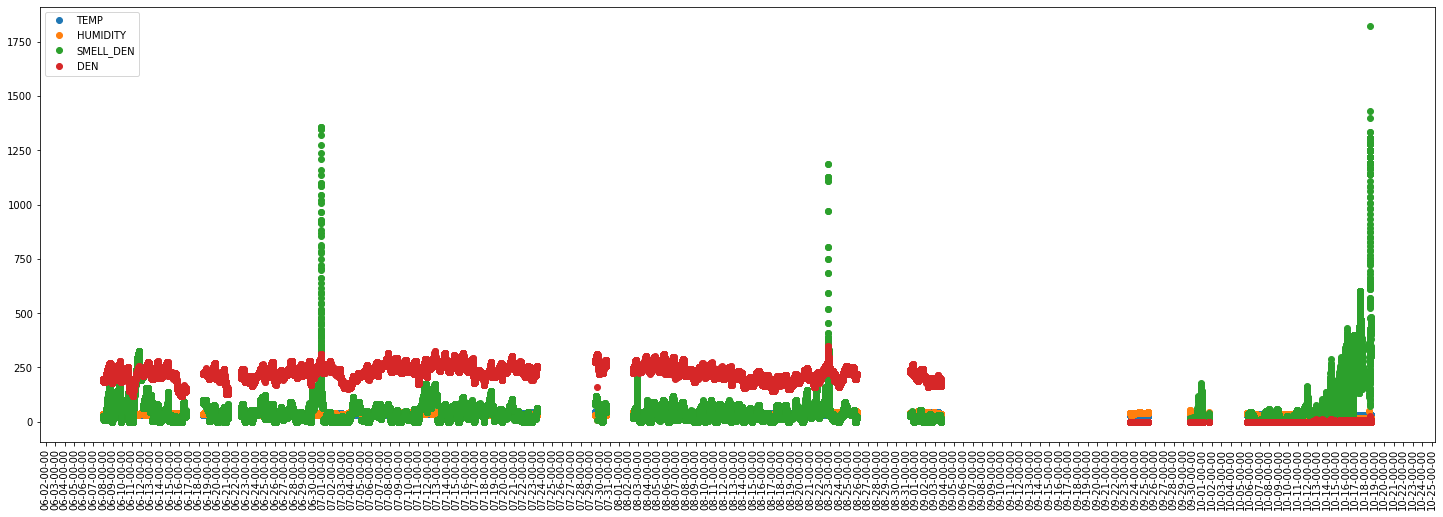

In [74]:
plt.figure(figsize = (25,8))
plt.plot_date(scaled_data5.index.values, scaled_data5[['TEMP','HUMIDITY','SMELL_DEN','DEN']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
# plt.axvline(pd.Timestamp('2021-04-24 15:02:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 15:20:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 15:50:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 16:30:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 17:05:00'),color='r')
# plt.grid()
plt.legend(['TEMP','HUMIDITY','SMELL_DEN','DEN'])
plt.show()

#### device4와 device5에서 수집된 온도가 같은지 비교

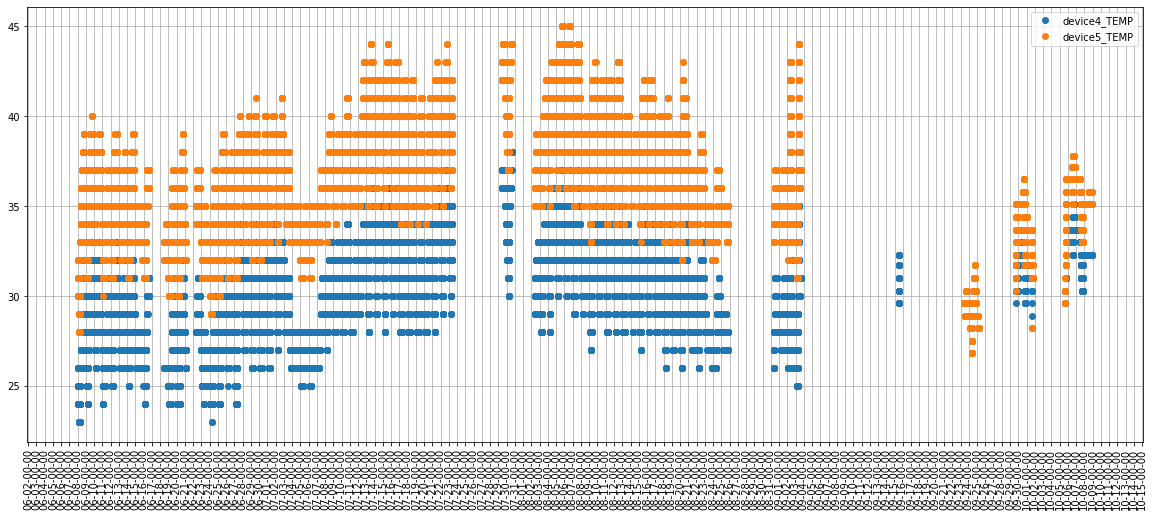

In [33]:
plt.figure(figsize = (20,8))
plt.plot_date(after_data4.index.values, after_data4[['TEMP']])
plt.plot_date(after_data5.index.values, after_data5[['TEMP']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.grid()
plt.legend(['device4_TEMP','device5_TEMP'])
plt.show()

#### device4와 device5에서 수집된 습도가 같은지 비교

In [ ]:
plt.figure(figsize = (20,8))
plt.plot_date(after_data4.index.values, after_data4[['HUMIDITY']])
plt.plot_date(after_data5.index.values, after_data5[['HUMIDITY']])
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.grid()
plt.legend(['device4_HUMIDITY','device5_HUMIDITY'])
plt.show()

In [ ]:
data = pd.read_csv('output.csv',index_col = 0)

In [39]:
data

,TEMP,HUMIDITY,SMOKE_DEN,REG_DTIME.1,pred,loss,inputs
REG_DTIME,,,,,,,
2021-04-04 12:41:09,0.317073,0.678571,0.959459,2021-04-04 12:41:09,0.299538,3.074867e-04,0.317073
2021-04-04 12:41:49,0.317073,0.678571,0.959459,2021-04-04 12:41:49,0.301024,2.575627e-04,0.317073
2021-04-04 12:42:19,0.317073,0.696429,0.945946,2021-04-04 12:42:19,0.302778,2.043471e-04,0.317073
2021-04-04 12:42:29,0.317073,0.678571,0.945946,2021-04-04 12:42:29,0.300728,2.671747e-04,0.317073
2021-04-04 12:42:49,0.292683,0.678571,0.972973,2021-04-04 12:42:49,0.301849,8.402281e-05,0.292683
...,...,...,...,...,...,...,...
2021-04-24 23:59:00,0.195122,0.482143,0.972973,2021-04-24 23:59:00,0.195884,5.801455e-07,0.195122
2021-04-24 23:59:20,0.195122,0.482143,0.959459,2021-04-24 23:59:20,0.195865,5.519334e-07,0.195122
2021-04-24 23:59:30,0.195122,0.482143,0.972973,2021-04-24 23:59:30,0.196076,9.093526e-07,0.195122


In [ ]:
#  xticks = pd.date_range(start='2021-04-04', end='2021-04-25', freq='D')
plt.figure(figsize = (20,8))
plt.plot_date(data.index.values, data[['TEMP','inputs', 'pred']])
# import ipdb; ipdb.set_trace()

# plt.gca().xaxis.set_major_locator(dates.DayLocator())
# plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m-%d-%H-%M'))
# plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
# plt.axvline(pd.Timestamp('2021-04-12 15:00:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-12 15:30:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-17 17:50:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 15:02:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 15:20:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 15:50:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 16:30:00'),color='r')
# plt.axvline(pd.Timestamp('2021-04-24 17:05:00'),color='r')
plt.grid()
plt.legend(['TEMP','inputs', 'pred'])
plt.savefig('4')

In [ ]:
data